In [83]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import display

import geopy
import geopy.distance
import networkx as nx
import osmnx as ox
ox.config(log_console=True)

# Creating and Analyzing the Graph

In [2]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
place = 'Istanbul, Turkey'
G = ox.graph_from_place(place, network_type='drive')

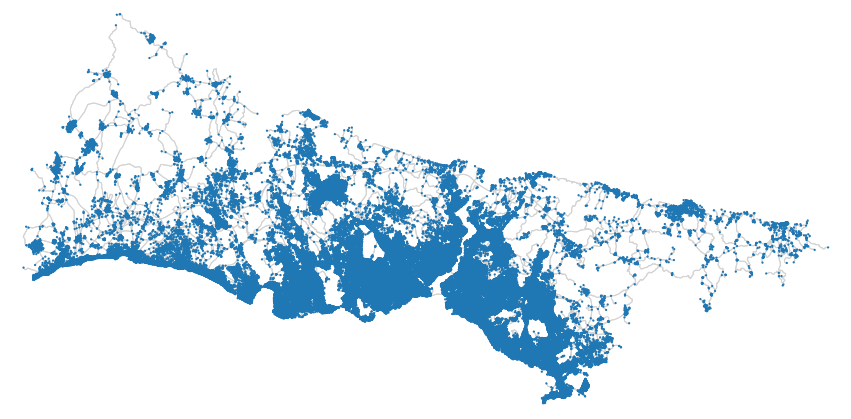

In [94]:
ox.plot.plot_graph(G, bgcolor='#FFFFFF', node_color=colors[0], edge_color='lightgray', node_size=5,figsize=(15, 15));

In [5]:
print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())

Nodes: 191181
Edges: 509486


In [6]:
edge_list = []
for i in G.edges:
    edge_list.append((i[0],i[1]))

**Defining the graph:**

In [7]:
Gnx = nx.from_edgelist(edge_list)

**10 nodes with highest degrees:**

In [126]:
degrees1 = dict(nx.degree(Gnx))
sorted_deg = sorted(degrees1.items(), key=lambda x:x[1], reverse=True)
print("Top 10 degrees: ", sorted_deg[:10])

Top 10 degrees:  [(278092313, 7), (1059240010, 7), (2632321804, 7), (353040715, 6), (7991622972, 6), (412053635, 6), (2360087644, 6), (4842697970, 6), (1514353119, 6), (663388839, 6)]


**Subgraph example:**

Place : Levent, Istanbul, Turkey
--------------------------------------------------


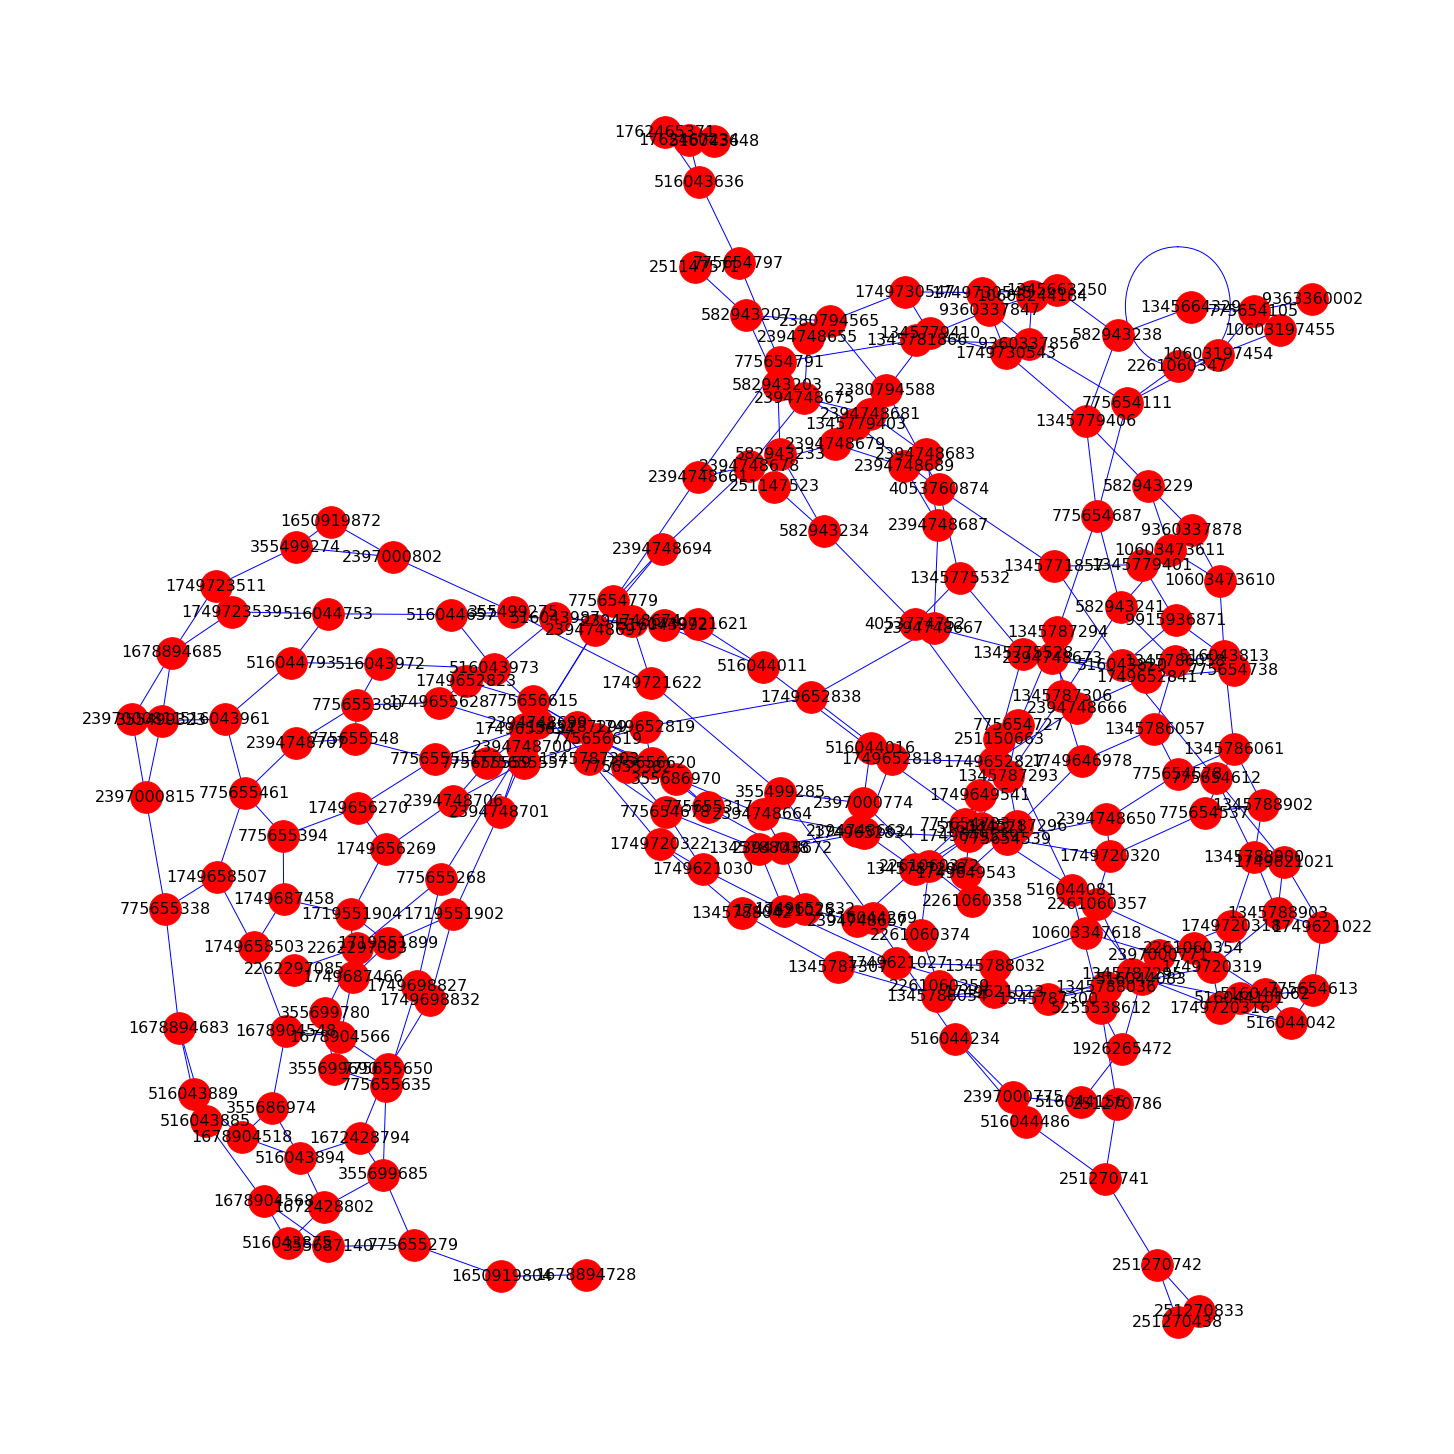

In [166]:
sub_place = 'Levent, Istanbul, Turkey'
G_sub = ox.graph_from_place(sub_place, network_type='drive')
sub_edge_list = []
for i in G_sub.edges:
    sub_edge_list.append((i[0],i[1]))
G_sub = nx.from_edgelist(sub_edge_list)

print("Place :", sub_place)
print("--------------------------------------------------")
plt.figure(figsize=(20,20))
nx.draw(G_sub,with_labels=True,node_size=1000,font_size=16, node_color="red", edge_color="blue")
plt.show();

**Density and Diameter of graph:**

In [17]:
display("Density: ",nx.density(Gnx))
display("---------------------")
display("Diameter: ",nx.approximation.diameter(Gnx))

'Density: '

1.5465287385499833e-05

'---------------------'

'Diameter: '

194

**Graph has no Eulerian paths:**

In [18]:
display("Eulerian Path: ", list(nx.eulerian_path(Gnx)))

NetworkXError: Graph has no Eulerian paths.

**Distrubition of degrees:**

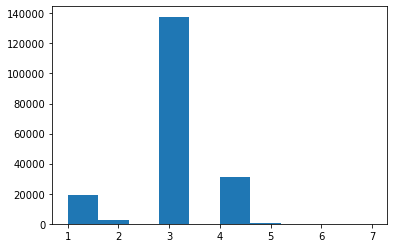

In [25]:
plt.hist([v for k,v in nx.degree(Gnx)]);

**Fundemental statistical information about graph:**

In [26]:
print("Stats Info of Graph: ")
print("-------------------")
ox.stats.basic_stats(G)

Stats Info of Graph: 
-------------------


{'n': 191181,
 'm': 509486,
 'k_avg': 5.329881107432224,
 'edge_length_total': 48948324.86699991,
 'edge_length_avg': 96.07393503845034,
 'streets_per_node_avg': 2.9686422813982563,
 'streets_per_node_counts': {0: 0,
  1: 19368,
  2: 390,
  3: 139128,
  4: 31504,
  5: 749,
  6: 39,
  7: 3},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.10130713826164733,
  2: 0.0020399516688373843,
  3: 0.7277292199538657,
  4: 0.16478624967962296,
  5: 0.00391775333322872,
  6: 0.00020399516688373844,
  7: 1.5691935914133725e-05},
 'intersection_count': 171813,
 'street_length_total': 27993226.13200079,
 'street_segment_count': 283875,
 'street_length_avg': 98.61110042096271,
 'circuity_avg': 1.0656907431834781,
 'self_loop_proportion': 0.0008771466314398943}

**Bridges info:**

In [27]:
display("Bridges: ",list(nx.bridges(Gnx)))

'Bridges: '

[(676670874, 1485004969),
 (10091718887, 1277519221),
 (2250213200, 2250213286),
 (31678629, 311367476),
 (311367476, 4780659225),
 (6601965071, 1408445457),
 (9328330266, 5087416400),
 (3389301230, 3389301231),
 (1941490118, 1941490116),
 (278373350, 269715458),
 (278373336, 278373337),
 (1941486613, 2351534547),
 (10696572971, 10696572970),
 (105408806, 513752481),
 (621411684, 269521166),
 (2364031899, 2364031908),
 (2270445012, 2270444990),
 (241865686, 2246706701),
 (2246706688, 2246706696),
 (2246706702, 2246706716),
 (1538900486, 1538900552),
 (2246153628, 6744564041),
 (2370652356, 2370652351),
 (2247813624, 2247813625),
 (2247906257, 6440108100),
 (355324339, 1633746394),
 (2246680099, 2246680107),
 (2364031842, 6775044760),
 (4147789680, 2445189138),
 (9205150269, 9205150286),
 (9935662821, 9955533049),
 (269722920, 9040148777),
 (2361227093, 1185323601),
 (2379726562, 1908677154),
 (6466429665, 6466429664),
 (248558982, 2373281249),
 (1573456762, 2246323609),
 (365245655, 15

**Additinal visualization of distributions of degrees:**

In [28]:
def plot_degree_distribution(G, prob_dist=False, logplot=None, plot_title_info=None, save=False):
    hist = nx.degree_histogram(G)
    degree_values = range(len(hist))
    y_label = "Number of Nodes"
    if prob_dist:
        hist /= np.sum(hist) # normalize
        y_label = "Probability"

    plt.figure()
    plt.grid(True)

    if logplot is None:
        plt.plot(degree_values, hist, color='b', marker='v', linestyle='solid', label='Degree (k)')
    elif logplot == 'loglog':
        plt.loglog(degree_values, hist, color='b', marker='v', linestyle='solid', label='Degree (k)')
    else:
        if logplot == 'semilogx':
            plt.semilogx(degree_values, hist, color='b', marker='v', linestyle='solid', label='Degree (k)')
        else:
            plt.semilogy(degree_values, hist, color='b', marker='v', linestyle='solid', label='Degree (k)')

    if G.is_directed():
        avgdeg = G.number_of_edges() / G.number_of_nodes()
    else: 
        avgdeg = 2 * G.number_of_edges() / G.number_of_nodes()

    plt.axvline(avgdeg, color='r', linestyle='dashed', label='Average Degree')

    plt.legend()
    plt.xlabel('Degree (k)')
    plt.ylabel(y_label)

    if plot_title_info is None:
        plt.title('Degree Distribution')
    else:
        plt.title(f'Degree Distribution - {plot_title_info}')
    
    if save:
        plt.savefig(f'degree_distribution_{logplot}_{G.name}.png')
    else:
        plt.show()        

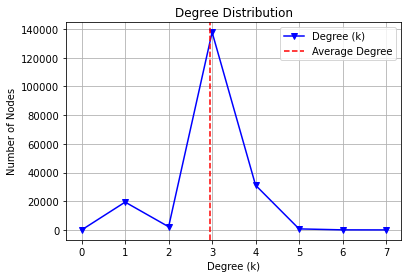

In [29]:
plot_degree_distribution(Gnx)

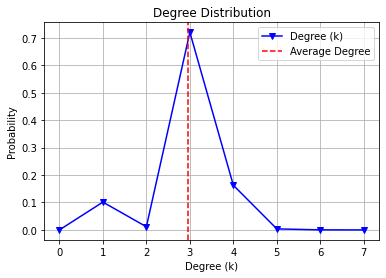

In [44]:
plot_degree_distribution(Gnx, prob_dist=True)

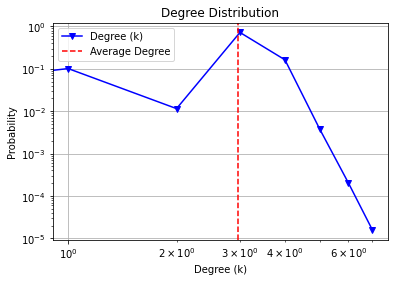

In [45]:
plot_degree_distribution(Gnx, prob_dist=True, logplot='loglog')

**Average Degree of the Network:**

In [31]:
degrees = nx.degree(Gnx)
avgdegrees = np.mean(list(dict(degrees).values()))
print(f"Average Degree of the Network: {avgdegrees:.4f}")

Average Degree of the Network: 2.9567


**Information about clustering:**

In [33]:
cc = nx.clustering(Gnx)
display(cc)

{21107200: 0,
 241865285: 0,
 1921490195: 0,
 21111240: 0,
 1536596670: 0,
 248002927: 0,
 21138837: 0,
 21139180: 0,
 1485005145: 0,
 21139115: 0,
 2373176831: 0,
 1880160368: 0,
 21139848: 0,
 2248258129: 0,
 676670874: 0,
 26443046: 0,
 26443104: 0,
 6398307918: 0,
 251386873: 0,
 26443346: 0,
 248570409: 0,
 26443371: 0,
 29264334: 0,
 26443704: 0,
 26443730: 0,
 6439310113: 0,
 26443757: 0,
 254485599: 0,
 254484663: 0,
 26633074: 0,
 1538904206: 0,
 278102003: 0,
 26633293: 0,
 410807102: 0,
 26633300: 0,
 26633303: 0,
 245940634: 0,
 8923372848: 0,
 26633316: 0,
 245940284: 0,
 26706399: 0,
 2364024697: 0,
 26706405: 0,
 26706406: 0,
 1538904205: 0.3333333333333333,
 27412849: 0,
 278335465: 0,
 269510161: 0,
 27412852: 0.3333333333333333,
 3453817705: 0,
 27412887: 0,
 251402843: 0,
 251409218: 0,
 27438912: 0,
 5924712960: 0,
 27463669: 0,
 2769149850: 0,
 423204897: 0,
 27463682: 0,
 8979116254: 0.3333333333333333,
 2359497430: 0,
 29189901: 0,
 1898831964: 0,
 29190676: 0,
 

In [34]:
cc_sorted = sorted(cc.items(), key=lambda x: x[1], reverse=True)
print(cc_sorted[:5])

[(353066986, 1.0), (2250070276, 1.0), (2385378999, 1.0), (3009385717, 1.0), (8836530015, 1.0)]


In [35]:
avg_cc = nx.average_clustering(Gnx)
print(f"Average Clustering Coefficient: {avg_cc:.3f}")

Average Clustering Coefficient: 0.041


**Connectivity:**

In [37]:
print("Connected: ", nx.is_connected(Gnx))

Connected:  True


In [38]:
print("Number of Connected Components: ", nx.number_connected_components(Gnx))

Number of Connected Components:  1


In [41]:
connected_components = nx.connected_components(Gnx)
sorted_conn_comp_sim = sorted(connected_components, key=lambda x: len(x), reverse=True)
giant_component = sorted_conn_comp_sim[0]
percent_giant_size = len(giant_component) / Gnx.number_of_nodes()
print(f"Ratio of the size of the giant component: {percent_giant_size * 100:.2f}%")

Ratio of the size of the giant component: 100.00%


In [43]:
giant_component == Gnx

True

# GPS Module

In [66]:
departure = ox.geocoder.geocode('Kapalı Çarşı, İstanbul')
arrival = ox.geocoder.geocode('Sabancı Üniversitesi, İstanbul')

In [85]:
departure

(41.01098795, 28.968175837679787)

In [67]:
node_i = ox.nearest_nodes(G, departure[1],departure[0])
node_j = ox.nearest_nodes(G, arrival[1],arrival[0])

In [68]:
route = nx.shortest_path(G, node_i, node_j, weight = 'length')

**Route Map:**

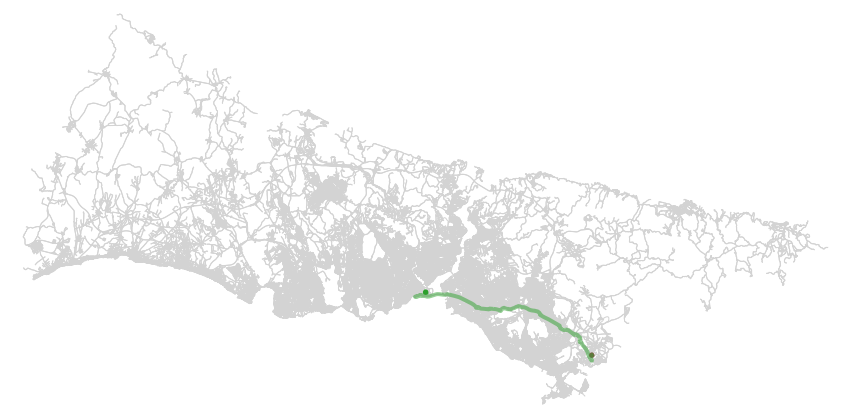

In [189]:
fig, ax = ox.plot.plot_graph_route(G, route, route_alpha=0.5, route_color=colors[2], route_linewidth=4, 
                         node_size=20, bgcolor='#FFFFFF', node_color='none', edge_color='lightgray',
                         orig_dest_size=0, show=False, close=False,figsize=(15, 15))

x = (G.nodes[node_i]["x"], G.nodes[node_j]["x"])
y = (G.nodes[node_i]["y"], G.nodes[node_j]["y"])
ax.scatter(x, y, s=30, c=[colors[2], colors[5]], alpha=1, edgecolor="none");

In [175]:
ax.get_position()

Bbox([[0.125, 0.31480388228962536], [0.9, 0.6901961177103746]])

**Directions:**

In [51]:
ox.bearing.add_edge_bearings(G);
route_edges = list(zip(route[:-1], route[1:]))
directions = []

for node_i, node_j in route_edges:
    for road in G[node_i][node_j].values():
        if 'name' not in road:
            continue

        name = road['name']
        length = road['length']
        bearing = road['bearing']
    
        if len(directions) == 0 or name != directions[-1][0]:
            directions.append([name, length, bearing])
            print(directions[-1])
            break
        else: 
            directions[-1][1] += length
            directions[-1][2] = bearing
            break

['Tavukpazarı Sokağı', 101.289, 104.1]
[['Peykhane Caddesi', 'Vezirhanı Caddesi'], 235.48000000000002, 165.0]
['Peykhane Caddesi', 39.043, 144.2]
['Piyer Loti Caddesi', 71.394, 256.2]
['Dizdariye Medresesi Sokağı', 32.104, 141.0]
['Göktaş Sokağı', 64.19, 211.8]
['Dizdariye Çeşmesi Sokağı', 36.864999999999995, 292.4]
['Katip Sinan Sokağı', 7.064, 171.3]
['Kadırga Limanı Caddesi', 18.076, 275.8]
['Kadırga Meydanı Sokağı', 117.442, 213.4]
['Cömertler Sokağı', 46.858000000000004, 234.2]
['Şair Sermet Sokağı', 75.97999999999999, 264.8]
['Kumluk Sokağı', 59.235, 233.3]
['Kennedy Caddesi', 405.14900000000006, 277.0]
['Avrasya Tüneli', 1050.986, 88.2]
['Kayışdağı Caddesi', 316.34799999999996, 109.7]
['Ayazoğlu Caddesi', 1024.635, 45.8]
['Ferhatpaşa Yolu Caddesi', 35.211, 68.6]
['27. Sokak', 87.333, 19.7]
['22. Sokak', 102.911, 114.6]
['Gazipaşa Caddesi', 151.608, 67.3]
['67. Cadde', 172.697, 78.5]
['Samandıra Caddesi', 314.045, 104.4]
['Yadigar Sokağı', 223.381, 99.4]
['Tuna Caddesi', 116.7659

In [52]:
print("Drive %1.1fm down %s" % (directions[0][1], directions[0][0]))

for i in range(1, len(directions)):
    change = directions[i][2]-directions[i-1][2]
    
    if change < -180:
        change += 360
    elif change > 180:
        change -= 360
   
    if np.abs(change) < 5:
        msg = 'Continue onto'
    elif change > 0:
        if change > 25: 
            msg = 'Turn right onto'
        else:
            msg = 'Turn slight right onto'
    elif change < 0:
        if change < -25:
            msg = 'Turn left onto'
        else:
            msg = 'Turn slight left onto'
    
    print('%s %s and drive for %1.1fm' % (msg, directions[i][0], directions[i][1]))

print("Arrive at your destination")

Drive 101.3m down Tavukpazarı Sokağı
Turn right onto ['Peykhane Caddesi', 'Vezirhanı Caddesi'] and drive for 235.5m
Turn slight left onto Peykhane Caddesi and drive for 39.0m
Turn right onto Piyer Loti Caddesi and drive for 71.4m
Turn left onto Dizdariye Medresesi Sokağı and drive for 32.1m
Turn right onto Göktaş Sokağı and drive for 64.2m
Turn right onto Dizdariye Çeşmesi Sokağı and drive for 36.9m
Turn left onto Katip Sinan Sokağı and drive for 154.4m
Turn right onto Kadırga Limanı Caddesi and drive for 18.1m
Turn left onto Kadırga Meydanı Sokağı and drive for 142.9m
Turn right onto Cömertler Sokağı and drive for 166.0m
Turn slight left onto Şair Sermet Sokağı and drive for 76.0m
Turn slight right onto Kumluk Sokağı and drive for 145.4m
Turn right onto Kennedy Caddesi and drive for 1527.8m
Turn slight right onto Avrasya Tüneli and drive for 7508.0m
Turn right onto Kayışdağı Caddesi and drive for 4397.1m
Turn left onto Ayazoğlu Caddesi and drive for 1024.6m
Turn right onto Ferhatpaşa 

In [90]:
total_distance = 0
for i in directions:
    total_distance += i[1]
    
print(f"Total distance calculated for the route is {total_distance/1000:.4}km.")

Total distance calculated for the route is 37.64km.
